# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: Javier Ramirez

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday October 27th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [56]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats
%matplotlib inline

### [35 points] Problem 1 - Monte Carlo Estimation of Definite Integrals 
***

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used constantly in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a very simple integral. 

**Part A** Compute by-hand, the integral $f(x) = \sin(x)$ for $0 \leq x \leq \pi$.

$$
\int_{0}^{\pi} sin(x) dx
$$

$$
[-cos(x)]^\pi_0
$$

$$
-cos(\pi) + cos(0)
$$

$$
2
$$

**Part B**: Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

The value estimates the probability the points (x,y)-cordinates are under the curve.

**Part C**: How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral? 

Multiplying the estimated probability that's below a certain area, by the area where the values are fall into, this will give us an esimate for the area under the curve, hence the integeral.  

**Part C** Write a function integrate that takes as arguments the number of points to sample and a boolean flag isPlot and approximates the definite integral of $f(x)$ from $0$ to $1$ by sampling $X$ from $U(0,\pi)$ and $Y$ from $U(0,1)$. Your function should perform 3 tasks: 

1. Return the estimate of the value of the integral. 
2. Return the sample variance of the random variable being simulated using the np.var function.  
4. If isPlot is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with isPlot=True for $1K$ samples so we can see your plot. Then, run your simulation (with the isPlot=False) with at least $10K$ samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

(1.9854865570687492, 2.2954331131877579)

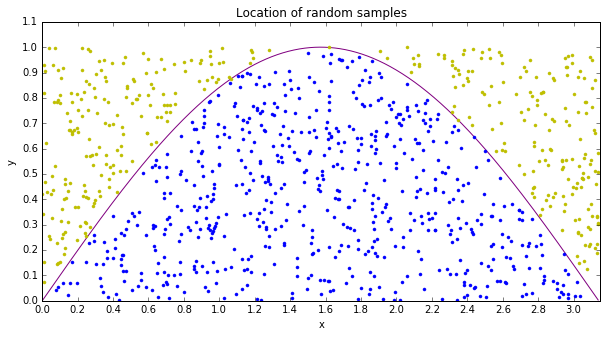

In [57]:
def integrate(num_samples=int(1e2), isPlot=False):
    curve=np.zeros(num_samples)
    x, y, xBottom, yBottom, xTop, yTop = ([] for i in range(6))
    for i in range(num_samples):
        x.append(np.random.uniform(0,np.pi))
        y.append(np.random.uniform(0,1))
        sinTrig = np.sin(x[i])
        if(y[i] <= sinTrig):
            curve[i]=1
            xBottom.append([x[i]])
            yBottom.append([y[i]])
        elif y[i] > sinTrig:
            xTop.append([x[i]])
            yTop.append([y[i]])
            
    curveProb = np.sum(curve)/num_samples
    var = np.var(curve * np.pi)
    if isPlot == 1:
        spot, sinSpot = ([] for i in range(2))
        for i in range(num_samples):
            spot.append(i/num_samples * np.pi)
            sinSpot.append(np.sin(spot[i]))
            
        fig, ax = plt.subplots(figsize=(10,5))
        ax.set_title("Location of random samples")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_xlim([0,3.15])
        ax.set_ylim([0,1])
        
        plt.xticks(np.arange(0,3.15,0.2))
        plt.yticks(np.arange(0,1.2,0.1))
        
        plt.plot(spot, sinSpot, color = "purple")
        plt.plot(xBottom,yBottom, "b.");
        plt.plot(xTop,yTop, "y.");
    estimate = curveProb*np.pi
    return estimate, var 
integrate(1000,True)

(1.9804600088230055, 2.2995767678995116)

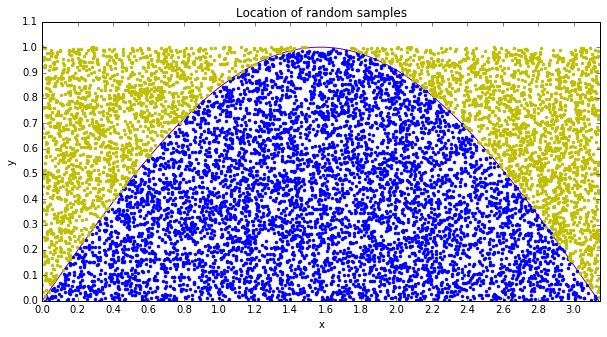

In [58]:
integrate(10000,True)

**Part D**: In the simulation above, what is distribution of the random variable we're actually sampling and what is/are its parameters?  

The random variable distribution follows the Bernouli distribution, because their are only 2 outcomes above and below. The parameter p from the distribution is the ratio between points under the curve and points above the curve. The probability of p = $\frac{2}{\pi}$.

**Part E**: Compute the expected value of the random variable you described in **Part D** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you computed in **Part C**? 

From A the expected probability point is falls below f(x) is expressed as p = $\frac{2}{\pi}$.
The expected value with be E[x] = p = $\frac{2}{\pi}$
To estimate the integral, need to multiply the expected value with the total area within the bounds of the integral.
Thus, the estimated area under the curve is:
$$
\pi E[x] = \pi * p = \pi * \frac{2}{\pi} = 2
$$

Thus the expected value that was calculated, is the same with both the true value in part A and the estimated value in part C.

**Part F**: Compute the variance of the random variable you described in **Part D** by hand.  Does this value agree with the sample variance observed in **Part C**? 

The variance of the random variable in the Bernouli distribution is Var(x) = p(1-p). 
$$
Var(x) = \pi^2Var(x)
$$

$$
\pi^2Var(x) = \pi^2 (p-p^2) = \pi ^2 (\frac{2}{pi} - \frac{4}{\pi^2})
$$

$$
\pi^2 Var(x) = 2.283
$$

The variance of the random variable is 2.28, which is almost identical to the sample variance from Part C.

### [25 points] Problem 2 - Sampling Freshies
***

Ralphie the buffalo stands alone in a field. Snow has come to Colorado and flakes collect on her majestic horns and beard. She shivers them off not because she is cold but just because her buffalo reflexes have been honed by millenia of adaptation. She is a biological machine. An inspiration. 

She wanders into her barn-mansion, hungry. There is hay from the autumn harvest. This is no ordinary hay, of course. It must be inspected with statistical care so that it is with high probability of the finest quality. You see, Ralphie's hay has a freshness score, measured in Freshies, named after Hayward Freshmann. The average piece of hay from her current supplier is 91 Freshies, and the standard deviation is 6 Freshies. 

You are new on the job, excited to apply your CSCI 3022 knowledge, and keen to prove yourself in a big and changing world. You are in charge of sampling the hay. Your boss, Governor John Hickenlooper, tells you that you must take a sample of hay and that the average freshness must be no less than 90 Freshies. If the average is below 90 Freshies, the bale of hay must be thrown away, rejected. The current system, when you arrive is to sample 30 pieces of hay from each bale to see if the average freshness is above the 90 Freshies threshold. 

**Part A**:  Say "Freshies Threshold" at least 10 times in a row, as quickly as possible. Do not show your work. 



**Part B**: What is the probability that a bale of hay is rejected under the current system of 30 samples?


Probability that $(X\leq91)$


$$
\bar{X}\sim N(91,\frac{6^2}{30})
$$

$$
Z = \frac{90-91}{\sqrt(\frac{6^2}{30})}
$$

$$
Z= -0.9128709 
$$

$$
P(\bar{X}\leq 90)=p(Z\leq-0.9128709)
$$

In [59]:
print("P = {:.3f}".format(stats.norm.cdf(-0.9128709)))

P = 0.181


The probability is 0.181 that the bale is rejected under the current system of 30 samples, which is probability of 1/5 that it is fresh.

**Part C**: Well, that's not good enough. Not for our Ralphie. You propose to Governor Hickelooper that you will get hay from a new supplier. The new supplier's hay has a standard deviation of 6 Freshies, just like the old one. But, they can harvest the hay from various parts of the field, to adjust the average Freshy level of the hay, $\mu$. Gov. Hickenlooper's requirement is that the probability that a bale of hay is rejected is less than 0.001. What is the minimum average Freshy level $\mu$ needed in order to achieve the Governor's requirement?


The freshies is 91 $\rightarrow \mu$, Standard Deviation is 6 $\rightarrow \sigma$, and $n=30$, and Probability to find is $P(\bar{X} \leq 90)=0.001$

$P(Z \leq -3.090) = 0.001$, making Z to $\bar X$:
$$
-3.090 = \frac{90 - \mu}{\frac{6}{\sqrt{30}}}
$$

$$
-3.090 = \frac{90 - \mu}{1.09544511501}
$$

$$
-3.38492541 = 90 - \mu
$$

$$
\mu = -93.3849254
$$

$$
\mu = 93.3849254
$$

The minimum average Freshie level is 93.3849254 for the hay to be rejected with a probability less than 0.001.

**Part D**: You are about to submit your report, given your answer above, when you find out that the new supplier is going out of business. Ugh.  You are stuck with the old hay. But the Governor's requirement still stands: the probability that a bale of hay is rejected must be less than 0.001. You decide you'll just take more samples from the existing bales of hay. Surely, the number must be greater than 30, but... what is the minimum number of samples that will ensure that each bale of hay is rejected with probability less than $0.001$?


The freshies is 91 $\rightarrow \mu$, Standard Deviation is 6 $\rightarrow \sigma$, we don't know $n$, and Probability of P is $P(\bar{X} \leq 90)=0.001$

In [60]:
print("P(Z \u2264 z) = 0.001, z = {:.3f}".format(stats.norm.ppf(.001)))

P(Z ≤ z) = 0.001, z = -3.090


$$
-3.090 = \frac{90-91}{\sqrt(\frac{6^2}{n})}
$$

$$
-3.090 = -\frac{\sqrt{n}}{6}
$$

$$
n = \frac{859329}{2500}
$$

$$
n = 343.7316
$$

The minimum number of samples that will ensure each bale of hay is rejected with probability less than 0.001 is 343.7316

**[Extra Credt - 2 points] Part E**: Draw an ASCII picture of Ralphie. 

 


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@.........@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@...@@@@@@@@@@@...@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@...@@@@@@@@@@@@@@@@@..@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@/............\\@@@@@@@@@....@@@@@@@@@@
@@@@@@@@@@@@@...|..|@@@@@@@@|..|@@@@@@@@@@@@....@@@@@@
@@@@@@@@@@...@@@|..|@@@@@@@@|..|@@@@@@@@@@@@@@@@..@@@@
@@@@@@..@@@@@@@@|..|@|...|@@@@@@@|...|@@@@@@@@@@@..@@@
@@@@@@@..@@@@@@@|..|@@|..|@@|..|@|..|@@@@@@@.@@@@@..@@
@@@@@@@..@@@@@@@|..|@@|..|@@|..|@|..|@@@@@..@@@@@@.@@@
@@@@@@@..@@@@@@@@\\............/@@|..|@@@@@..@@@@@@.@@@
@@@@@..@@@@@@@@@@@@@@@|..|@@@@@@@|..|@@@@@@@@@@@@@.@@@
@@@@@.@@@@@@@@@@@@@@@@|..|@@@@@@@/..|@@@@@@@@@@@..@@@@
@@@@..@@@@.@@@@@@@@@@@\\............/@@@@@@@@@@@..@@@@@
@@@..@@@@@.............@@@@@@@@@@@@@....@@...@@@@@@@@@
@@.@@@@@@@.@@@@@@@@@@@@@..@@@@@@@@@..@@@@@@@@@@@@@@@@@
@@.@@@@@@..@@@@@@@@@@@@@@.@@@@@@..@@@@@@@@@@@@@@@@@@@@
@@@..@@@..@@@@@@@@@@@@@@@.......@@@@@@@@@@@@@@@@@@@@@@
@@@@.....@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

### [40 points] Problem 3 - Not-so-Easy Peasy Plinko 
***

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In class we looked at a [simplified version of Plinko](https://github.com/chrisketelsen/csci3022/blob/master/inclass-notebooks/lecture11solutions.ipynb):  

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko1.png)


In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko2.png)


**Part A**: Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left or right when hitting a peg is equal to $p = 0.5$. 

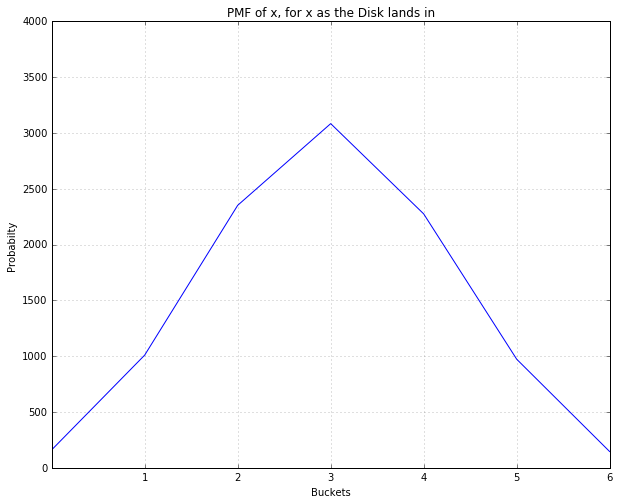

In [61]:
def plinko_trial(num_rows, p):
    bucket = 0
    i = 0
    while i < num_rows:
        bucket = bucket + np.random.choice([0,1], p=[1-p, p])
        i = i + 1
    return bucket

count = 0
win = [0]*10000

while count < 10000:
    win[count] = plinko_trial(6, 0.5)
    count = count + 1

dfPlinko = pd.DataFrame(win)
dfPlinko.columns = ["PMF of x, for x as the Disk lands in"]
BinFreq = [0]*8

for i in range(0,8,1):
    if i == 0:
        total = (dfPlinko.loc[dfPlinko["PMF of x, for x as the Disk lands in"] == i]+1)
        BinFreq[i] = total.sum()
    else:
        total = dfPlinko.loc[dfPlinko["PMF of x, for x as the Disk lands in"] == i]
        BinFreq[i] = total.sum()/i                                 

fig, ax = plt.subplots(figsize = [10,8])
ax.set_title("PMF of x, for x as the Disk lands in")
ax.set_xlabel("Buckets")
ax.set_ylabel("Probabilty")
ax.grid(True, alpha = 1/2)

ax.set_ylim([0,4000])
ax.set_xlim([0,6])

plt.yticks(np.arange(0,4001,500))
plt.xticks(np.arange(1,6+1,1))

plt.plot(BinFreq);

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

the probability of landing in a bucket uses Binomial distributions is $X \sim Bin(6, 0.5)$

For each bucket from 0 to 6 these are the probabilities.

$P(x = 0) \rightarrow {6 \choose 0}0.5^0(0.5)^6 = 0.01563$


$P(x = 1) \rightarrow {6 \choose 1}0.5^1(0.5)^5 = 0.09375
$

$
P(x = 2) \rightarrow {6 \choose 2}0.5^2(0.5)^4 = 0.23438
$

$
P(x = 3) \rightarrow {6 \choose 3}0.5^3(0.5)^3 = 0.3125
$

$
P(x = 4) \rightarrow {6 \choose 4}0.5^4(0.5)^2 = 0.23438
$

$
P(x = 5) \rightarrow {6 \choose 5}0.5^5(0.5)^1 = 0.09375
$

$
P(x = 6) \rightarrow {6 \choose 6}0.5^6(0.5)^0 = 0.01563
$

**Part C**: Write a simulator for Plinko with boundaries. Your code should be similar to your code from **Part A**, but should take in two variable boundaries, left_bound and right_bound, corresponding to the location of the left boundary and right boundary, respectively. 


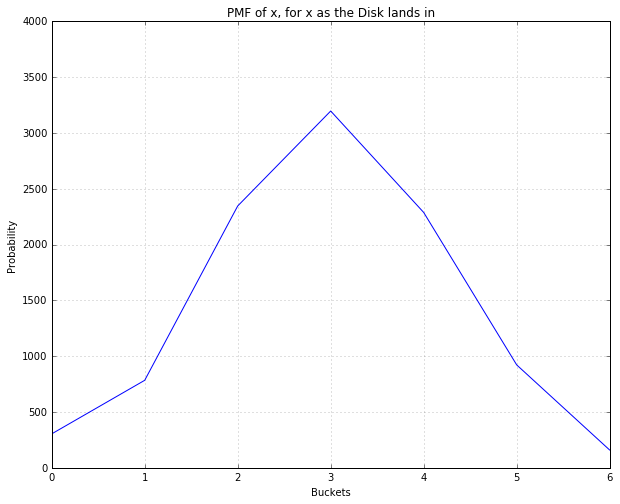

In [62]:
def plinko_trial_bound(left_bound, right_bound):
    num_rows = 6
    p =1/2
    bucket = 3
    i = 0
    while i < num_rows:
        if bucket != left_bound and bucket != right_bound:
            bucket = bucket + np.random.choice([-1/2,1/2], p=[1-p, p])
        elif bucket == left_bound:
            bucket = bucket + 1/2
        elif bucket == right_bound:
            bucket = bucket - 1/2
        i = i + 1
    return bucket

count = 0
win = [0]*10000

while count < 10000:
    win[count] = plinko_trial_bound(6,1/2)
    count = count + 1
    
dfPlinko = pd.DataFrame(win)
dfPlinko.columns = ["PMF of x, for x as the Disk lands in"]
BinFreq = [0]*8

for i in range(0,8,1):
    if i == 0:
        total = (dfPlinko.loc[dfPlinko["PMF of x, for x as the Disk lands in"] == i]+1)
        BinFreq[i] = total.sum()
    else:
        total = dfPlinko.loc[dfPlinko["PMF of x, for x as the Disk lands in"] == i]
        BinFreq[i] = total.sum()/i

fig, ax = plt.subplots(figsize = [10,8])
ax.set_title("PMF of x, for x as the Disk lands in")
ax.set_xlabel("Buckets")
ax.set_ylabel("Probability")
ax.grid(True, alpha = 1/2)

ax.set_ylim([0,4000])
ax.set_xlim([0,6])

plt.yticks(np.arange(0,4001,500))
plt.xticks(np.arange(0,6+1,1))

plt.plot(BinFreq);

**Part D**: Consider the board with left_bound $= 0.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko3.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the no-boundary board from **Part A**. Explain the mechanism that causes the differences between the two PMFs in words. 




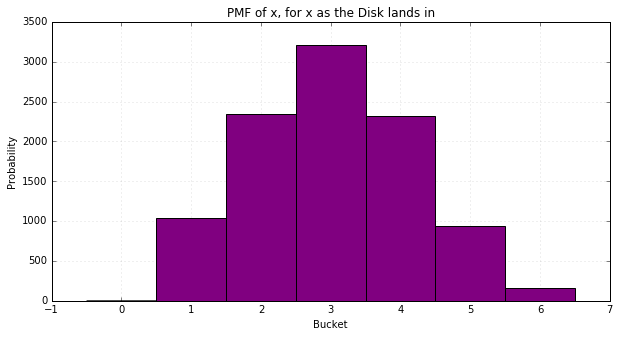

In [63]:
sample = 10000
trials = np.zeros(sample)
for i in range(sample):  
    trials[i] = plinko_trial_bound(0.5, 6.5)
s = pd.Series(trials)
fig, ax = plt.subplots(figsize=(10,5))
s.hist(ax=ax, bins=np.linspace(-1/2,6.5,8), facecolor="purple")
ax.set_ylabel('Probability')
ax.set_xlabel('Bucket')
ax.set_title("PMF of x, for x as the Disk lands in")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

The mechanism accounts for the difference of the two PMF's is the bounds in part D. Because of the bounds it will not land on 0, and if something were to land there it would go to 1. Thus the probability the disk lands in 1 on part D is equal to the probability that the disk lands in 1 in part B added with the probability the disk lands on 0 in part B. Thus the PMF's are almost identical.

**Part E**: Now consider the board with left_bound $= 1.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko4.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the boards from **Parts A** and **D**. Explain the mechanism that causes the differences between the three PMFs in words. 


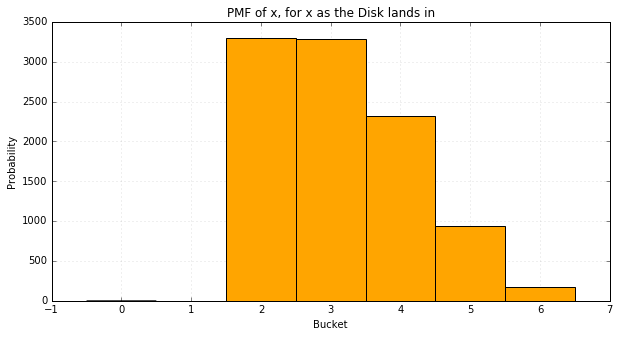

In [64]:
sample = 10000
trials = np.zeros(sample)
for i in range(sample):  
    trials[i] = plinko_trial_bound(1.5, 6.5)
s = pd.Series(trials)
fig, ax = plt.subplots(figsize=(10,5))
s.hist(ax=ax, bins=np.linspace(-1/2,6.5,8), facecolor="orange")
ax.set_ylabel('Probability')
ax.set_xlabel('Bucket')
ax.set_title("PMF of x, for x as the Disk lands in")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

The mechanism accounts for the difference of the three PMF's. Because of the boundary the disks can't land in 0 or 1, if something were to land in those spots, they would either land in 2 or 3 for this Plinko with bounds. Thus landing in 0 or 1 without bounds is distributed to the probability of 2 or 3 for Part E, with 2 having the most probability in land in from 0 and 1. Thus this is the difference between  part E and the other two parts. 

**Part F**: OK, one more. Consider the board with left_bound $= 1.5$ and right_bound $= 5.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko5.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Use your observations from **Parts A-D** to write down the **true** PMF of $X$. 




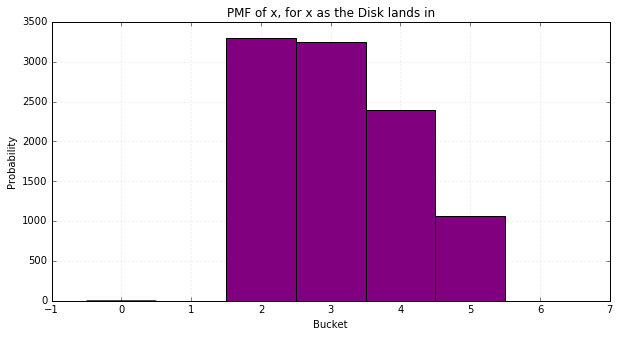

In [65]:
sample = 10000
trials = np.zeros(sample)
for i in range(sample):  
    trials[i] = plinko_trial_bound(1.5, 5.5)
s = pd.Series(trials)
fig, ax = plt.subplots(figsize=(10,5))
s.hist(ax=ax, bins=np.linspace(-1/2,6.5,8), facecolor="purple")
ax.set_ylabel('Probability')
ax.set_xlabel('Bucket')
ax.set_title("PMF of x, for x as the Disk lands in")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

Since the disks can't land in 0, 1, or 6, the probability of getting to those spots is zero. Bucket 4 would not have any add disks becuase of the new bounds, so the probability is the same as when it had no bounds.
$$P(x=4)\rightarrow 0.234$$.
For any disks that would be in 6 would now be in 5.
$$P(x=5) \rightarrow P(x=5)+P(x=6) \rightarrow 0.109$$

For disks falling in 0 or 1 would now fall in 2 or 3, with those falling in zero had only one place in falling. About 3/4 falling in 2 and 1/4 falling in 3. If a disk was gaing to fall in 1 it had 6 possible choices, 3 of the choices would fall with 3/4 probability of falling in 2. The other 3 would fall with 1/4 landing on 2.

For those that would fall in bucket 1 would be 1/2 + 1/2(3/4) = 87.5 will go to to bucket 2.
For those that would fall in bucket 2, 12.5 would fall in bucket 3.
$$
P(x=2) = p(x=2)+3/4(x=0)+.875(x=1) \rightarrow 0.328
$$

$$
P(x=3) = P(x=3) + 1/4P(x=0) +.125(x=1) \rightarrow 0.328
$$

$$
P(x=0) = P(x=1) \rightarrow 0
$$

$$
P(x=4) \rightarrow 0.234
$$

$$
P(x=5) \rightarrow 0.1094
$$

$$
P(x=6) \rightarrow 0
$$

The PMF estimate from the simulator is almost identical to this.

**Part G**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Part F**. I offer to pay you a dollar amount equal to the bucket that your disc lands in, but also charge you a flat fee for each disc that you play.  How much should I charge you per disc so that we break even in the long run? 

This will be the expected value E[X] of the distribution from part F.
$$
E[X] = P(x=0)*0 + P(x=1)*1+P(x=2)*2 + P(x=3)*3+ P(x=4)*4 + P(x=5)*5 + P(x=6)*6
$$

$$
\rightarrow 0*(0) + 0*(1) + P(X=2)(2) + P(X=3)(3) + P(X=4)(4) + P(X=5)(5) + 0*(6)
$$

$$
\rightarrow 0.328*2+0.328*3+0.234*4+0.1094*5
$$

$$
E[x] = 3.13
$$

To break even I would want to be charged $3.13 per each disk

### Challenge Problem - Real-Deal Plinko 
***

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 
